The paper analyzes the 'engin' dataset, which encompasses data on a set of Thai workers. 

The variables for which information has been collected are:
 1. male                             =1 if male
 2. educ                             highest grade completed
 3. wage                             monthly salary, Thai baht
 4. swage                            starting wage
 5. exper                            years on current job
 6. pexper                           previous experience
 7. lwage                            log(wage)
 8. expersq                          exper^2
 9. highgrad                         =1 if high school graduate
10. college                          =1 if college graduate
11. grad                             =1 if some graduate school
12. polytech                         =1 if a polytech
13. highdrop                         =1 if no high school degree
14. lswage                           log(swage)
15. pexpersq                         pexper^2
16. mleeduc                          male*educ
17. mleeduc0                         male*(educ - 14)


Based on the variables provided in the dataset, you I conducted various analyses to explore relationships and patterns within the data.   
Here some  analyses I performed on dataset:

1. Descriptive Statistics:
2. Correlation Analysis
3. Gender-Based Analysis
4. Experience Analysis
5. Educational Level Analysis
6. Educational Categories Analysis





In [3]:
import pandas as pd
import seaborn as sn
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statsmodels.api as sm


import matplotlib.pyplot as plt

Let's read the file


In [4]:

engin = pd.read_csv('C:/Users/giorg/Documents/Istruzione/Unito/Python/engin.csv')

We now take a look at the structure of the dataframe

In [5]:
engin.head()

,male,educ,wage,swage,exper,pexper,lwage,expersq,highgrad,college,grad,polytech,highdrop,lswage,pexpersq,mleeduc,mleeduc0
0,0,12,20400,11250,6,0,9.923290,36,1,0,0,0,0,9.328123,0,0,0
1,0,12,23850,12750,12,3,10.079540,144,1,0,0,0,0,9.453286,9,0,0
2,0,12,22800,11250,12,0,10.034520,144,1,0,0,0,0,9.328123,0,0,0
3,0,12,20700,11250,12,0,9.937889,144,1,0,0,0,0,9.328123,0,0,0
4,0,12,21300,11250,12,1,9.966462,144,1,0,0,0,0,9.328123,1,0,0


Here we count the number of variables and observations of encountered in the dataset


In [6]:
engin.shape

(403, 17)

What types of variables are there in the dataset?


In [7]:

engin.dtypes

male          int64
educ          int64
wage          int64
swage         int64
exper         int64
pexper        int64
lwage       float64
expersq       int64
highgrad      int64
college       int64
grad          int64
polytech      int64
highdrop      int64
lswage      float64
pexpersq      int64
mleeduc       int64
mleeduc0      int64
dtype: object

In [8]:
engin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   male      403 non-null    int64  
 1   educ      403 non-null    int64  
 2   wage      403 non-null    int64  
 3   swage     403 non-null    int64  
 4   exper     403 non-null    int64  
 5   pexper    403 non-null    int64  
 6   lwage     403 non-null    float64
 7   expersq   403 non-null    int64  
 8   highgrad  403 non-null    int64  
 9   college   403 non-null    int64  
 10  grad      403 non-null    int64  
 11  polytech  403 non-null    int64  
 12  highdrop  403 non-null    int64  
 13  lswage    403 non-null    float64
 14  pexpersq  403 non-null    int64  
 15  mleeduc   403 non-null    int64  
 16  mleeduc0  403 non-null    int64  
dtypes: float64(2), int64(15)
memory usage: 53.7 KB


How many people in the df have an experience in their current job greater than 12 years?

In [9]:
above_12 = engin[engin["exper"] > 12]
above_12.head()

,male,educ,wage,swage,exper,pexper,lwage,expersq,highgrad,college,grad,polytech,highdrop,lswage,pexpersq,mleeduc,mleeduc0
57,0,12,24300,10950,16,1,10.09823,256,1,0,0,0,0,9.301095,1,0,0
58,0,12,24750,14250,16,34,10.11658,256,1,0,0,0,0,9.564512,1156,0,0
59,0,12,22950,11250,16,0,10.04107,256,1,0,0,0,0,9.328123,0,0,0
60,0,8,25050,10950,16,1,10.12863,256,0,0,0,0,1,9.301095,1,0,0
61,1,15,25950,17100,16,7,10.16393,256,0,0,0,1,0,9.746834,49,15,1


In [10]:
above_12.shape

(263, 17)

How many people in the df have a previous job experience greater than 7 years?

In [11]:
above_7 = engin[engin["pexper"] > 7]
above_7.shape

(222, 17)

As can be observed from the data, a significant portion of the workers in the dataset has been working in their current job for a long time and has many years of experience in their previous job.
We want to add a column for "female" variable:

In [12]:

def convertitore(boolean):
    return 0 if boolean==1 else 1

engin["female"] = engin.male.apply(convertitore)
engin


,male,educ,wage,swage,exper,pexper,lwage,expersq,highgrad,college,grad,polytech,highdrop,lswage,pexpersq,mleeduc,mleeduc0,female
0,0,12,20400,11250,6,0,9.923290,36,1,0,0,0,0,9.328123,0,0,0,1
1,0,12,23850,12750,12,3,10.079540,144,1,0,0,0,0,9.453286,9,0,0,1
2,0,12,22800,11250,12,0,10.034520,144,1,0,0,0,0,9.328123,0,0,0,1
3,0,12,20700,11250,12,0,9.937889,144,1,0,0,0,0,9.328123,0,0,0,1
4,0,12,21300,11250,12,1,9.966462,144,1,0,0,0,0,9.328123,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1,16,43650,19500,11,3,10.683960,121,0,1,0,0,0,9.878170,9,16,2,0
399,1,19,75000,42510,11,9,11.225240,121,0,0,1,0,0,10.657490,81,19,5,0
400,1,15,31650,14250,11,2,10.362490,121,0,0,0,1,0,9.564512,4,15,1,0
401,1,19,61875,28740,11,5,11.032870,121,0,0,1,0,0,10.266050,25,19,5,0


In [13]:
engin["sex"] =pd.from_dummies(engin[["male", "female"]])
engin


,male,educ,wage,swage,exper,pexper,lwage,expersq,highgrad,college,grad,polytech,highdrop,lswage,pexpersq,mleeduc,mleeduc0,female,sex
0,0,12,20400,11250,6,0,9.923290,36,1,0,0,0,0,9.328123,0,0,0,1,female
1,0,12,23850,12750,12,3,10.079540,144,1,0,0,0,0,9.453286,9,0,0,1,female
2,0,12,22800,11250,12,0,10.034520,144,1,0,0,0,0,9.328123,0,0,0,1,female
3,0,12,20700,11250,12,0,9.937889,144,1,0,0,0,0,9.328123,0,0,0,1,female
4,0,12,21300,11250,12,1,9.966462,144,1,0,0,0,0,9.328123,1,0,0,1,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1,16,43650,19500,11,3,10.683960,121,0,1,0,0,0,9.878170,9,16,2,0,male
399,1,19,75000,42510,11,9,11.225240,121,0,0,1,0,0,10.657490,81,19,5,0,male
400,1,15,31650,14250,11,2,10.362490,121,0,0,0,1,0,9.564512,4,15,1,0,male
401,1,19,61875,28740,11,5,11.032870,121,0,0,1,0,0,10.266050,25,19,5,0,male


Let's now study the distribution of salaries in the dataset:

<Axes: xlabel='wage', ylabel='Count'>

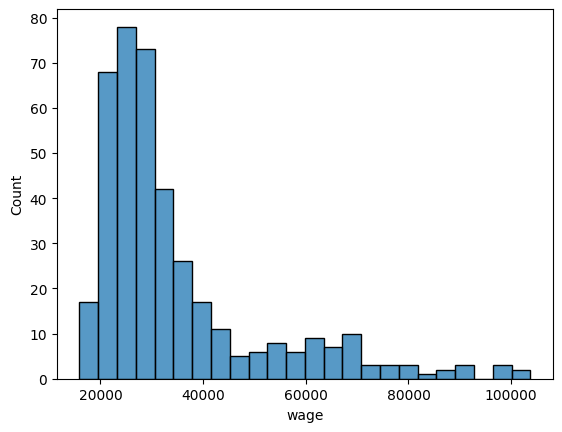

In [14]:
sn.histplot(data=engin["wage"])

What is the absolute highest salary in the dataset? And to whom does it belong?

In [15]:
engin[engin['wage']==engin['wage'].max()]

,male,educ,wage,swage,exper,pexper,lwage,expersq,highgrad,college,grad,polytech,highdrop,lswage,pexpersq,mleeduc,mleeduc0,female,sex
90,1,16,103750,27510,17,12,11.54974,289,0,1,0,0,0,10.22231,144,16,2,0,male


As we can see, the majority of salaries are distributed between 20,000 and 40,000 Thai Baht. 

<Axes: >

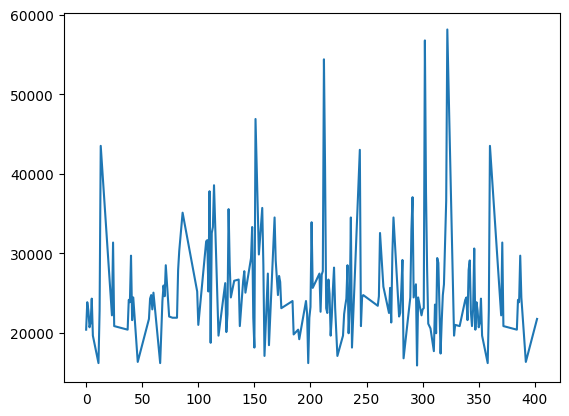

In [16]:
female_wage = engin.loc[engin["sex"] =="female", "wage" ]
female_wage.plot()

What are the statistics explaining the 'wage' and 'experience' variables?

In [17]:
engin[["wage", "exper"]].describe()

,wage,exper
count,403.000000,403.000000
mean,34683.436725,13.513648
std,17041.548694,1.751101
min,15900.000000,6.000000
25%,24150.000000,12.000000
50%,28500.000000,14.000000
75%,37800.000000,15.000000
max,103750.000000,17.000000


Let's now analyze the distribution of current salary values based on years of previous work experience. As can be noticed, there is no real correlation between the two variables

<Axes: xlabel='pexper', ylabel='wage'>

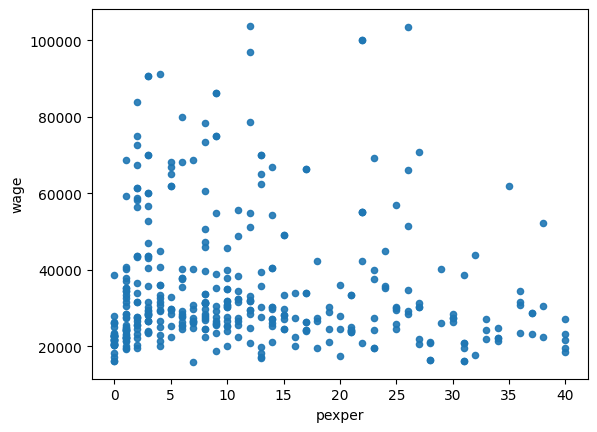

In [18]:
engin.plot.scatter(y = "wage", x = "pexper", alpha = 0.9)

Plotting the linear regression between the two variables, "previous experience" and "wage", we obtain the preannunciated result. There's no much of a correlation here:

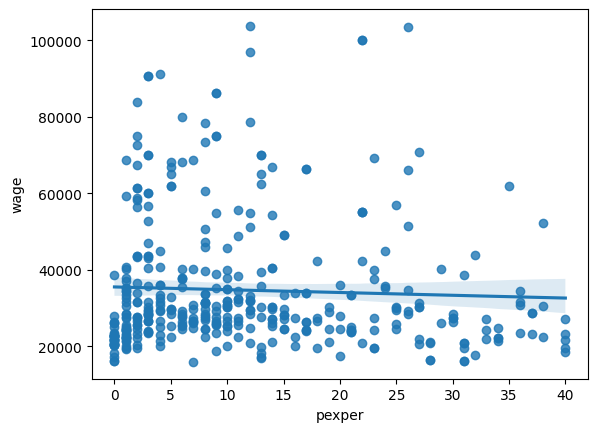

In [19]:
sn.regplot(x="pexper", y="wage", data=engin);

Instead, plotting linear regression between variables "starting wage" and actual "wage", we can observe a correlation between these two.

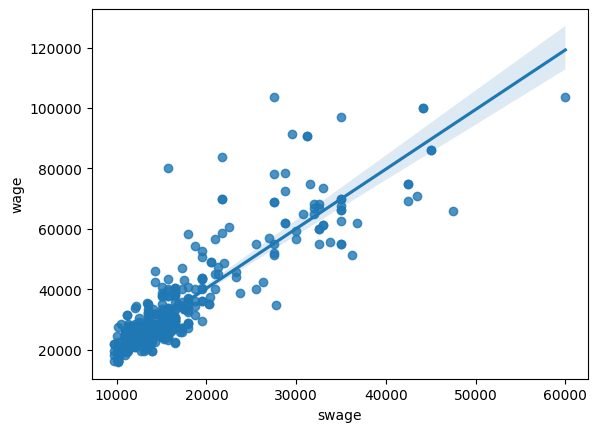

In [20]:
sn.regplot(x="swage", y="wage", data=engin);

Do males have higher wages than females in this dataset?

<Axes: xlabel='male', ylabel='wage'>

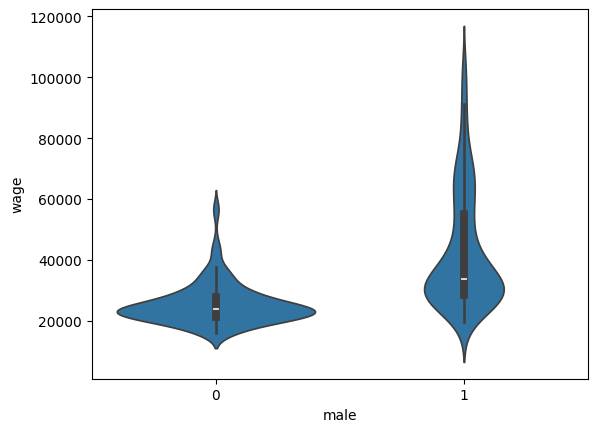

In [21]:
sn.violinplot(x="male", y="wage", data=engin)

Let's plot a box graph. The line inside the "box" represents the median of the "wage" data for each level of "pexper." The "box" itself ontains the central 50% of the data. Points outside the whisker lines are considered outliers, meaning they are values that deviate significantly from the rest of the distribution.
As we can see, the median wage is around 30000 thai dollars.

<Axes: >

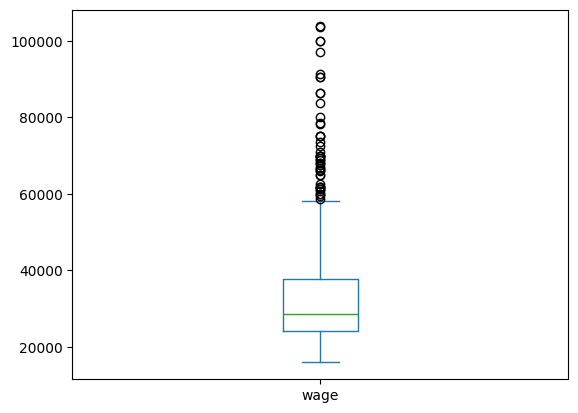

In [22]:
engin.plot.box(x = "exper", y = "wage")

The actual median value of wage is:

In [23]:
engin[["wage", "exper"]].median()

wage     28500.0
exper       14.0
dtype: float64

Let's now see how the current salary of workers is distributed based on the accumulated experience in their previous job.  
To understand the impact of the worker's gender on the current salary, with the same previous experience, we will color female workers in red and male workers in blue.

In [24]:
px.scatter(engin, x="pexper", y="wage", color="sex")

Which is the dataset mean salary for both categories, males and females, in the dataset?
As we can see there is a huge difference between females and males salaries. 

In [25]:
engin[["wage", "sex"]].groupby("sex").mean()

,wage
sex,
female,25548.078947
male,42832.347418


Which is the dataset highest salary for both categories, males and females, in the dataset?

In [26]:
engin[["wage", "sex"]].groupby("sex").max()

,wage
sex,
female,58125
male,103750


Now let's observe the average salary for those who have or have not obtained a high school diploma, a college degree, and a polytechnic degree.

In [27]:
engin[["wage","highgrad"]].groupby("highgrad").mean()

,wage
highgrad,
0,41398.755274
1,25095.903614


In [28]:
engin[["wage","college"]].groupby("college").mean()

,wage
college,
0,32708.676056
1,49288.437500


In [29]:
engin[["wage","polytech"]].groupby("polytech").mean()

,wage
polytech,
0,35481.173469
1,32531.743119


Could be interesting to evaluate the current wage with total accumulated experience for each person in the dataset.  
To analyse wheter or not females have lower wages than males, we differentiate the sex for colors: blue for males and red for females.

In the plot below, teh size of the markers is proportional to the education level.

In [30]:
engin["totexp"]=engin["pexper"]+engin["exper"]
engin["education"]=1.5*engin["highgrad"]+2*engin["college"]+engin["grad"]+0.5*engin["polytech"]+0.1*engin["highdrop"]


px.scatter(engin, x="totexp", y="wage", color="sex", size="education")

We now plot five subplots, each subplot focuses on a specific educational category, and the scatter plots within each subplot show the relationship between total experience, wage earned, and gender for individuals within that category.  
The color of the points in each subplot indicates the gender of the individuals, orange for females and blue for males. 

In [31]:
fig = make_subplots(rows=3, cols=2, subplot_titles=["College", "High Grad", "Grad", "Polytech", "High Drop"])

df_college = engin[engin["college"] == 1]
df_highgrad = engin[engin["highgrad"] == 1]
df_grad = engin[engin["grad"] == 1]
df_polytech = engin[engin["polytech"] == 1]
df_highdrop = engin[engin["highdrop"] == 1]

color_scale = {'male': 'rgb(31, 119, 180)', 'female': 'rgb(255, 127, 14)'}

scatter_college = go.Scatter(x=df_college['totexp'], y=df_college['wage'], mode='markers', marker=dict(color=df_college['sex'].map(color_scale)), name='College')
scatter_highgrad = go.Scatter(x=df_highgrad['totexp'], y=df_highgrad['wage'], mode='markers', marker=dict(color=df_highgrad['sex'].map(color_scale)), name='High Grad')
scatter_grad = go.Scatter(x=df_grad['totexp'], y=df_grad['wage'], mode='markers', marker=dict(color=df_grad['sex'].map(color_scale)), name='Grad')
scatter_polytech = go.Scatter(x=df_polytech['totexp'], y=df_polytech['wage'], mode='markers', marker=dict(color=df_polytech['sex'].map(color_scale)), name='Polytech')
scatter_highdrop = go.Scatter(x=df_highdrop['totexp'], y=df_highdrop['wage'], mode='markers', marker=dict(color=df_highdrop['sex'].map(color_scale)), name='High Drop')

fig.add_trace(scatter_college, row=1, col=1)
fig.add_trace(scatter_highgrad, row=1, col=2)
fig.add_trace(scatter_grad, row=2, col=1)
fig.add_trace(scatter_polytech, row=2, col=2)
fig.add_trace(scatter_highdrop, row=3, col=1)

fig.update_layout(showlegend=False)

fig.update_layout(height=800, width=800, showlegend=True)

fig.show()



Correlation between the variables.

In [ ]:
engin.drop('sex', axis=1).corr()

,male,educ,wage,swage,exper,pexper,lwage,expersq,highgrad,college,grad,polytech,highdrop,lswage,pexpersq,mleeduc,mleeduc0,female,totexp,education
male,1.000000,0.497004,0.506924,0.523953,-0.046633,0.128718,0.575732,-0.040331,-0.492231,0.086404,0.347291,0.306505,-0.127102,0.607345,0.017532,0.968409,0.257803,-1.000000,0.118674,-0.223447
educ,0.497004,1.000000,0.699165,0.699695,-0.053002,-0.068847,0.742070,-0.050755,-0.523056,0.300930,0.635409,0.266501,-0.607454,0.746220,-0.117293,0.655179,0.801829,-0.497004,-0.076261,0.098404
wage,0.506924,0.699165,1.000000,0.883653,-0.033213,-0.044684,0.972472,-0.026613,-0.471430,0.315528,0.666035,-0.076975,-0.191300,0.881079,-0.097047,0.623823,0.645673,-0.506924,-0.049301,0.085467
swage,0.523953,0.699695,0.883653,1.000000,-0.102900,0.127616,0.863976,-0.101072,-0.459583,0.254638,0.729379,-0.103921,-0.171535,0.974248,0.058074,0.643540,0.662562,-0.523953,0.108362,0.058658
exper,-0.046633,-0.053002,-0.033213,-0.102900,1.000000,0.030889,-0.013747,0.996419,0.005000,0.027792,-0.090473,0.028786,0.018699,-0.094895,0.042241,-0.065493,-0.090808,0.046633,0.194359,-0.001219
pexper,0.128718,-0.068847,-0.044684,0.127616,0.030889,1.000000,-0.059200,0.034026,-0.032520,-0.045312,0.019850,-0.023923,0.129009,0.137061,0.950177,0.093248,-0.088491,-0.128718,0.986466,-0.083619
lwage,0.575732,0.742070,0.972472,0.863976,-0.013747,-0.059200,1.000000,-0.007910,-0.521729,0.339689,0.640391,0.002628,-0.228743,0.896176,-0.119911,0.681357,0.628150,-0.575732,-0.060354,0.062965
expersq,-0.040331,-0.050755,-0.026613,-0.101072,0.996419,0.034026,-0.007910,1.000000,0.002606,0.028147,-0.090420,0.031662,0.017843,-0.092813,0.044553,-0.059678,-0.090296,0.040331,0.196850,-0.002770
highgrad,-0.492231,-0.523056,-0.471430,-0.459583,0.005000,-0.032520,-0.521729,0.002606,1.000000,-0.307742,-0.307742,-0.509588,-0.245792,-0.520416,0.050780,-0.553637,-0.425075,0.492231,-0.031095,0.547754
college,0.086404,0.300930,0.315528,0.254638,0.027792,-0.045312,0.339689,0.028147,-0.307742,1.000000,-0.135211,-0.223896,-0.107993,0.293755,-0.049051,0.113314,0.137116,-0.086404,-0.039910,0.555969


Let's drop some non-functional variables.

In [ ]:
new_engin=engin.drop(labels=["highdrop", "lswage", "pexper", "lwage", "mleeduc", "mleeduc0", "sex"], axis=1)
new_engin.corr()

,male,educ,wage,swage,exper,expersq,highgrad,college,grad,polytech,pexpersq,female,totexp,education
male,1.000000,0.497004,0.506924,0.523953,-0.046633,-0.040331,-0.492231,0.086404,0.347291,0.306505,0.017532,-1.000000,0.118674,-0.223447
educ,0.497004,1.000000,0.699165,0.699695,-0.053002,-0.050755,-0.523056,0.300930,0.635409,0.266501,-0.117293,-0.497004,-0.076261,0.098404
wage,0.506924,0.699165,1.000000,0.883653,-0.033213,-0.026613,-0.471430,0.315528,0.666035,-0.076975,-0.097047,-0.506924,-0.049301,0.085467
swage,0.523953,0.699695,0.883653,1.000000,-0.102900,-0.101072,-0.459583,0.254638,0.729379,-0.103921,0.058074,-0.523953,0.108362,0.058658
exper,-0.046633,-0.053002,-0.033213,-0.102900,1.000000,0.996419,0.005000,0.027792,-0.090473,0.028786,0.042241,0.046633,0.194359,-0.001219
expersq,-0.040331,-0.050755,-0.026613,-0.101072,0.996419,1.000000,0.002606,0.028147,-0.090420,0.031662,0.044553,0.040331,0.196850,-0.002770
highgrad,-0.492231,-0.523056,-0.471430,-0.459583,0.005000,0.002606,1.000000,-0.307742,-0.307742,-0.509588,0.050780,0.492231,-0.031095,0.547754
college,0.086404,0.300930,0.315528,0.254638,0.027792,0.028147,-0.307742,1.000000,-0.135211,-0.223896,-0.049051,-0.086404,-0.039910,0.555969
grad,0.347291,0.635409,0.666035,0.729379,-0.090473,-0.090420,-0.307742,-0.135211,1.000000,-0.223896,0.005092,-0.347291,0.004639,-0.074640
polytech,0.306505,0.266501,-0.076975,-0.103921,0.028786,0.031662,-0.509588,-0.223896,-0.223896,1.000000,-0.101053,-0.306505,-0.018756,-0.645709


Eventually, we also look at the correlation matrix of the restricted dataset (matrix is made of absolute values of correlation, just to have an easier color reading).  
As we can see, the variables male, education, wage and starting wage are sligthly correlated. 

In [ ]:
px.imshow(abs(new_engin.corr()))

We finally perform an OLS analysis taking into consideration the dummy variable of the dataset. The variables used in order to conduct the analysis are:  
1. wage 
2. male
3. educ
4. swage
5. exper
6. expersq


In [ ]:
from statsmodels.formula.api import ols

fit = ols('wage ~ C(male) + educ + swage + exper + expersq', data=engin).fit() 

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     319.1
Date:                Fri, 05 Jan 2024   Prob (F-statistic):          1.28e-136
Time:                        15:50:48   Log-Likelihood:                -4172.8
No. Observations:                 403   AIC:                             8358.
Df Residuals:                     397   BIC:                             8382.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.895e+04   1.75e+04      1.651      0.100   -5528.691    6.34e+04
C(male)[T.1]   968.0431    920.528      1.052      0.294    -841.676    2777.763
educ           907.4793    197.221      4.601      0.000     519.751    1295.207
swage            1.7202      0.073     23.448      0.000       1.576       1.864
exper        -6081.3418   2586.473     -2.351      0.019   -1.12e+04    -996.446
expersq        244.6214     95.245      2.568      0.011      57.373     431.870
==============================================================================
Omnibus:                      202.320   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1635.670
Skew:                           1.978   Prob(JB):                         0.00
Kurtosis:                      12.042   Cond. No.                     8.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the conducted analysis, we can see that the R-squared coefficient is equal to 0.801. This leads us to infer that a significant portion of the outcome for the dependent variable is explained by the independent variables in the model.
As said in the OLS model plot, the condition number is large, 8.73e+05. This might indicate that there are strong multicollinearity, as we have seen before from the correlation matrix.

We now write a code that fits a regression model with the dependent variable "wage" and the independent variable "highdrop" (indicating whether the individual does not have a high school degree).  To examine the impact of not having a high school degree ("highdrop") on wages we analyze the results.

In [ ]:
engin['constant'] = 1

model = sm.OLS(engin['wage'], engin[['constant', 'highdrop']])
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     15.23
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           0.000111
Time:                        16:18:52   Log-Likelihood:                -4490.4
No. Observations:                 403   AIC:                             8985.
Df Residuals:                     401   BIC:                             8993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    3.564e+04    869.495     40.989      0.0

The R-squared value is 0.037, which means that the model explains about 3.7% of the variation in wages. 
The F-statistic tests the overall significance of the model. With a p-value of 0.000111, the model is considered statistically significant.
The coefficient for "highdrop" is -12,040. This indicates that, on average, individuals without a high school degree earn approximately $12,040 less in wages compared to those with a high school degree.
The p-value for "highdrop" is less than 0.001, indicating that the variable is statistically significant in predicting wages.

Not having a high school degree has a statistically significant negative impact on wages.
